Attempting Monte Carlo Simulation with 50 attempts. Pi: 2.88 
Attempting Monte Carlo Simulation with 500 attempts. Pi: 3.096 
Attempting Monte Carlo Simulation with 5000 attempts. Pi: 3.1304 
Attempting Monte Carlo Simulation with 50000 attempts. Pi: 3.12464 
Real PI: 3.141592653589793


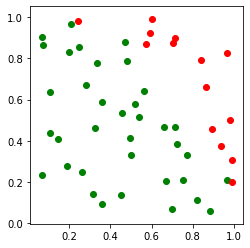

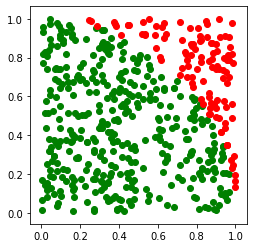

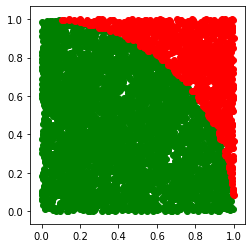

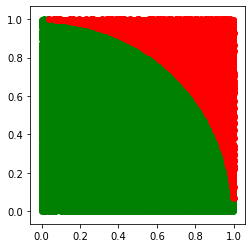

In [32]:
import math 

def calc_pi(num_attempts, display_plot=False):

    import matplotlib
    import matplotlib.pyplot as plt
    # matplotlib.use('TkAgg')
    from random import random
    
    inside = 0

    x_inside = []
    y_inside = []
    x_outside = []
    y_outside = []

    for _ in range(num_attempts):
        x = random()
        y = random()
        if x**2+y**2 <= 1:
            inside += 1
            x_inside.append(x)
            y_inside.append(y)
        else:
            x_outside.append(x)
            y_outside.append(y)

    pi = 4*inside/num_attempts
    
    if display_plot:
        fig, ax = plt.subplots()
        ax.set_aspect('equal')
        ax.scatter(x_inside, y_inside, color='g')
        ax.scatter(x_outside, y_outside, color='r')
        # fig.show()
    
    return pi

print('Attempting Monte Carlo Simulation with {} attempts. Pi: {} '.format(50, calc_pi(50, True)))
print('Attempting Monte Carlo Simulation with {} attempts. Pi: {} '.format(500, calc_pi(500, True)))
print('Attempting Monte Carlo Simulation with {} attempts. Pi: {} '.format(5_000, calc_pi(5_000, True)))
print('Attempting Monte Carlo Simulation with {} attempts. Pi: {} '.format(50_000, calc_pi(50_000, True)))

print('Real PI: {}'.format(math.pi))




In [33]:
def plot_attempt_pi_MC_n_times(num_times, mc_attempts):

# ok, lets use this function to try to see what the drift between that and Pi is.
    import matplotlib.pyplot as plt
    import statistics

    pi_vals = []

    for i in range(num_times):

        pi = calc_pi(mc_attempts)
        pi_vals.append(pi)

    # print (pi_vals)
    attempt = list(range(1, num_times + 1))
    actual_pi = [math.pi]*num_times

    plt.plot(attempt, pi_vals)
    plt.plot(attempt, actual_pi)
    plt.plot(attempt, [22/7]*num_times)
    avg = statistics.mean(pi_vals)
    plt.plot(attempt, [avg]*num_times)
    
    print('Avg: {}. Diff to actual Pi: {}'.format(avg, math.pi - avg))
    
    plt.show()

    return pi_vals

    

Avg: 3.1424. Diff to actual Pi: -0.000807346410206744


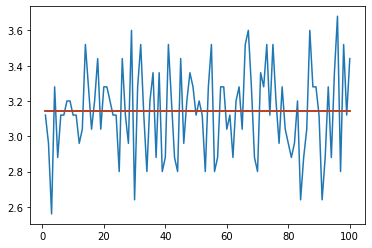

Avg: 3.1324. Diff to actual Pi: 0.009192653589793043


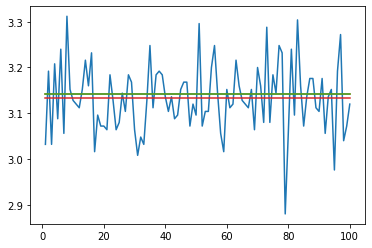

Avg: 3.143128. Diff to actual Pi: -0.001535346410206806


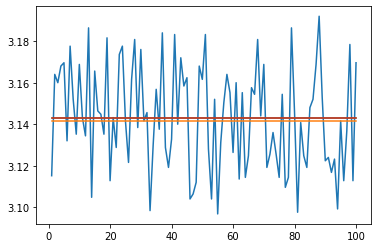

Avg: 3.1411968. Diff to actual Pi: 0.00039585358979321583


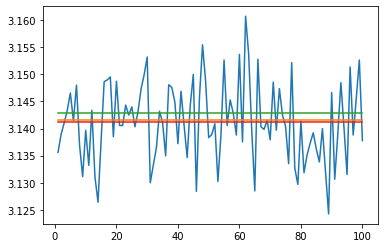

3.1428072

calc_pi(5000000): 3.1421448. Diff to actual Pi: -0.0002673464102067591


In [35]:
ax = plot_attempt_pi_MC_n_times(100, 50)
x = plot_attempt_pi_MC_n_times(100, 500)
y = plot_attempt_pi_MC_n_times(100, 5_000)
z = plot_attempt_pi_MC_n_times(100, 50_000)
display(calc_pi(5000000))
print('calc_pi(5000000): {}. Diff to actual Pi: {}'.format(calc_pi(5000000), math.pi - calc_pi(5000000)))